<a href="https://colab.research.google.com/github/BDAVIDOV91/colab_research_notebooks/blob/main/ML_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [29]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [30]:
df["class"] = (df["class"] == "g").astype(int)

In [31]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

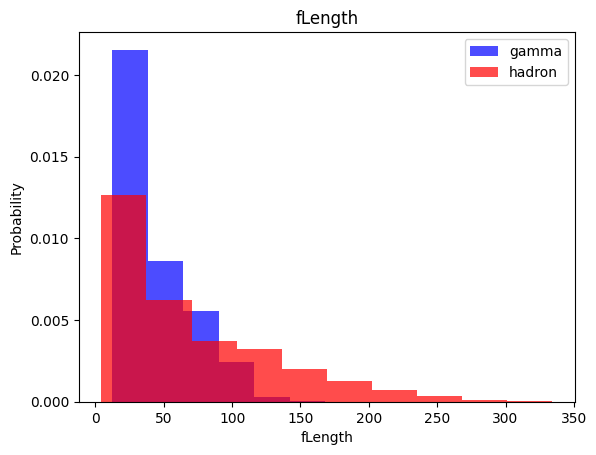

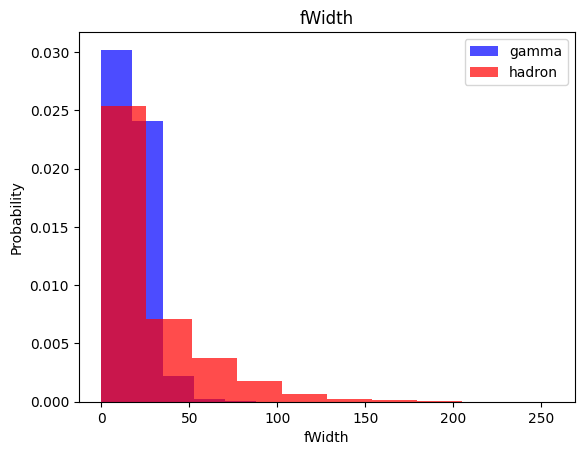

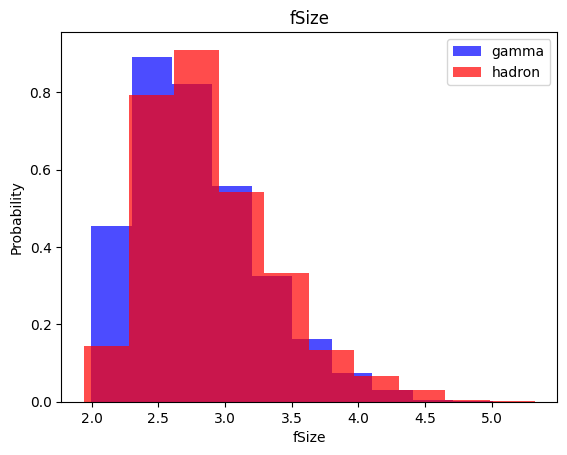

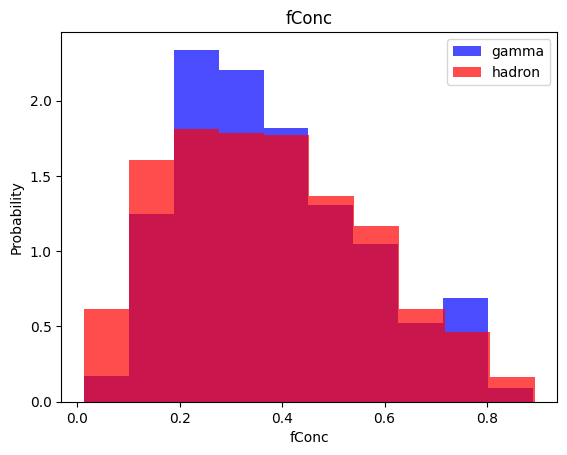

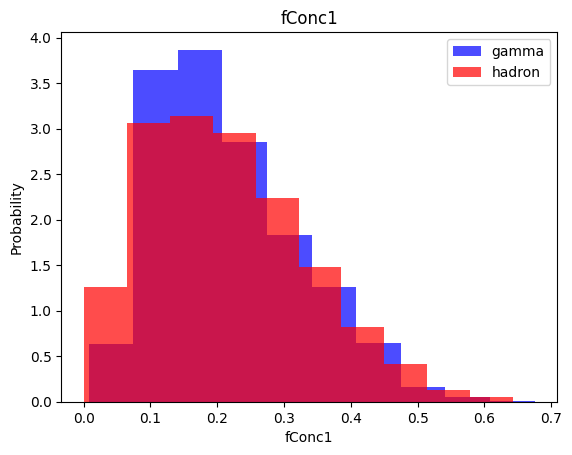

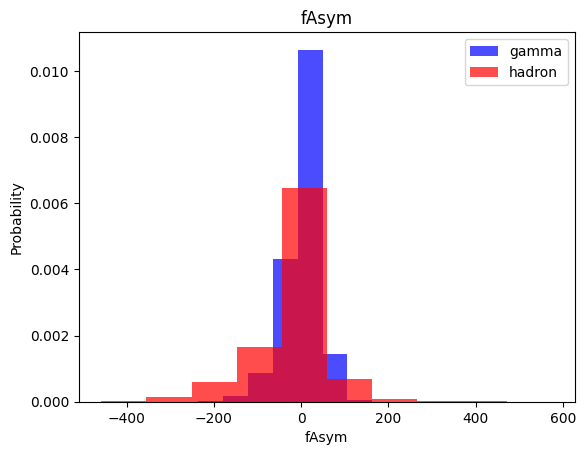

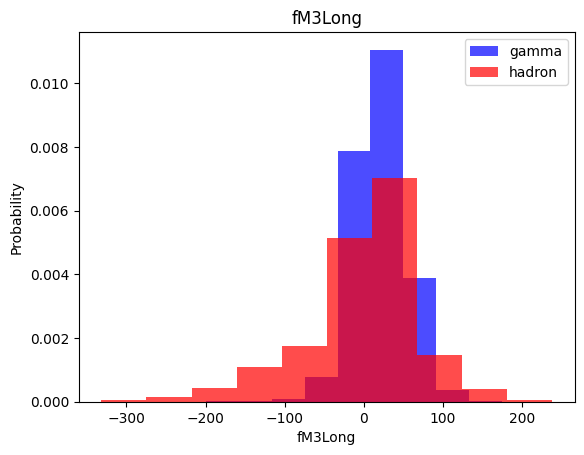

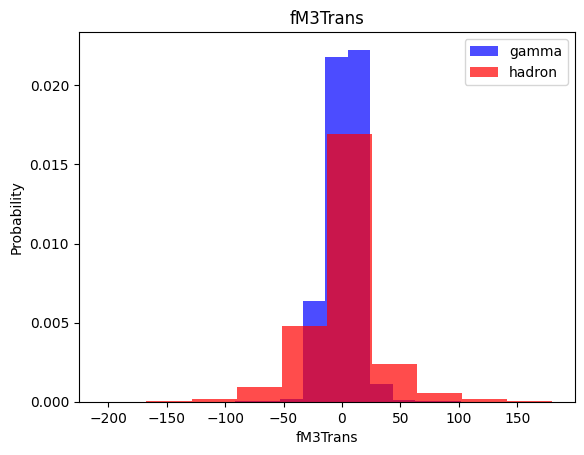

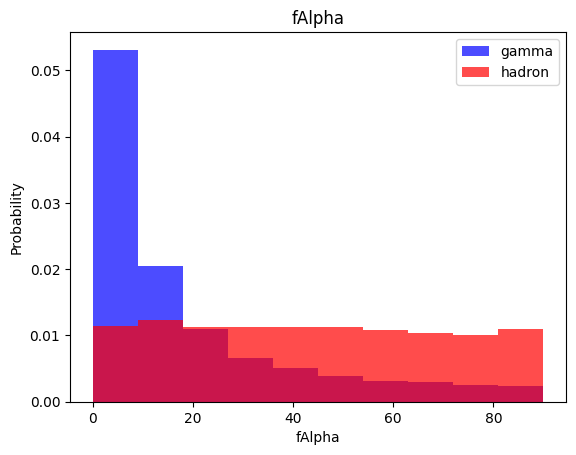

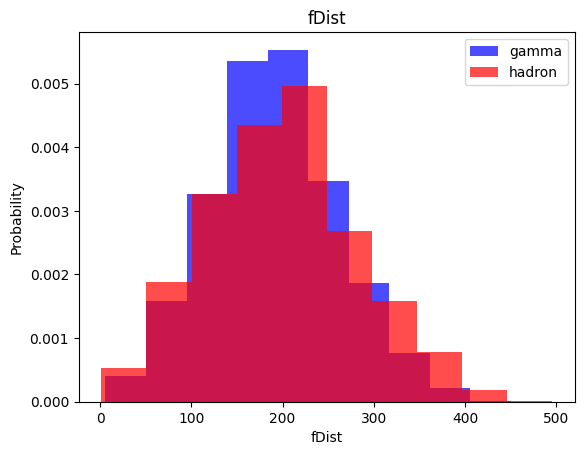

In [32]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train ,Validation, test dataset


In [33]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [34]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [35]:
train_df = pd.DataFrame(train)
valid_df = pd.DataFrame(valid)
test_df = pd.DataFrame(test)
train, X_train, y_train = scale_dataset(train_df, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid_df, oversample = False)
test, X_test, y_test = scale_dataset(test_df, oversample = False)

# kNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = knn_model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1353
           1       0.83      0.90      0.86      2451

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train , y_train)

In [43]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.52      1353
           1       0.74      0.91      0.82      2451

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Log Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train , y_train)

In [46]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1353
           1       0.84      0.83      0.83      2451

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM - Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , y_train)

In [49]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1353
           1       0.88      0.91      0.89      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [50]:
import tensorflow as tf

In [51]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [52]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

    history = nn_model.fit(
        X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


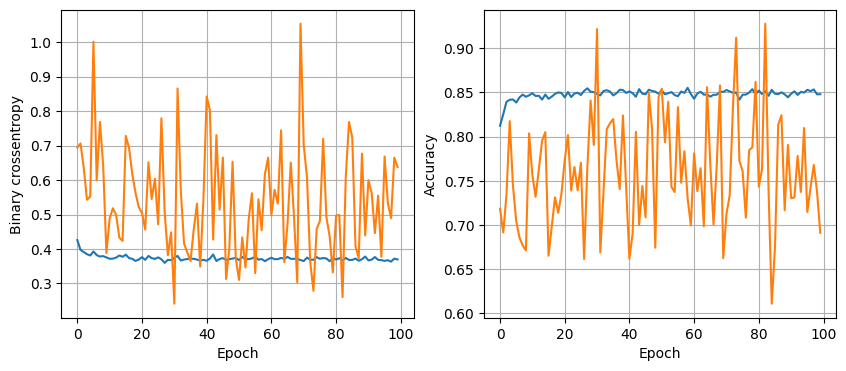

119/119 [==============================] - 0s 959us/step - loss: 0.3582 - accuracy: 0.8502
16 nodes, dropout 0, lr 0.1, batch size 64


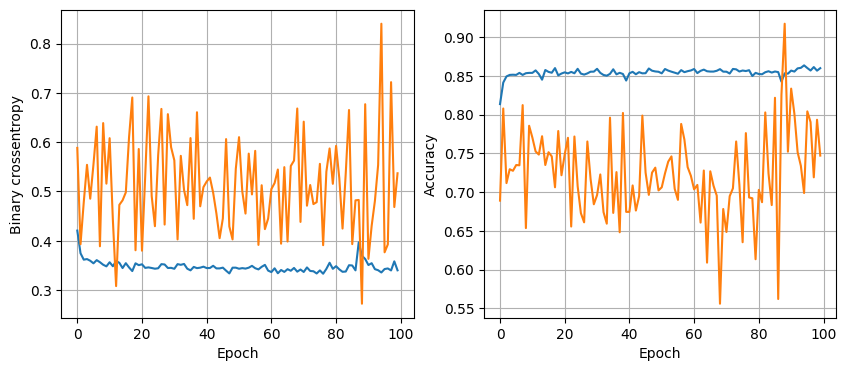

119/119 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8494
16 nodes, dropout 0, lr 0.1, batch size 128


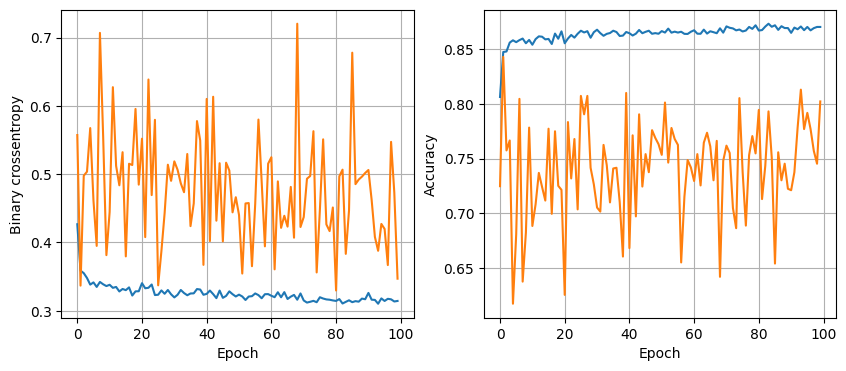

119/119 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8552
16 nodes, dropout 0, lr 0.005, batch size 32


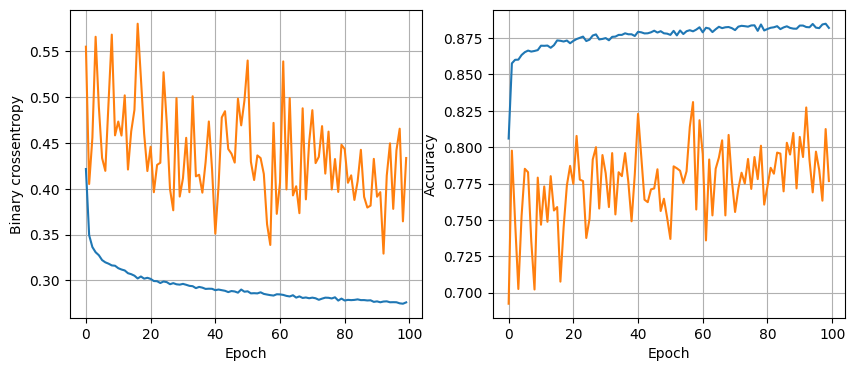

119/119 [==============================] - 0s 999us/step - loss: 0.3356 - accuracy: 0.8657
16 nodes, dropout 0, lr 0.005, batch size 64


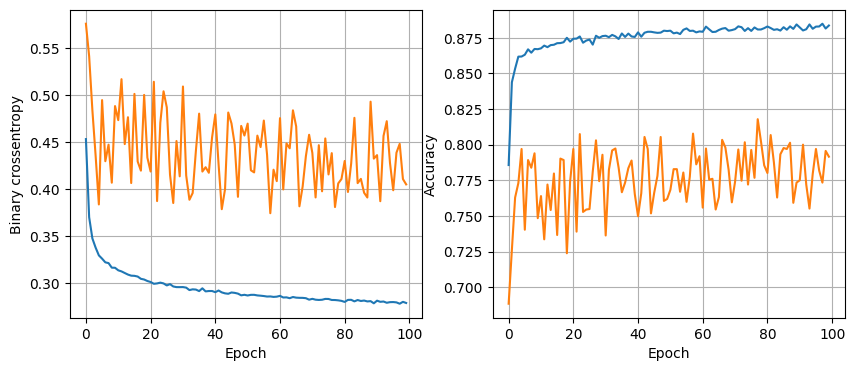

119/119 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8620
16 nodes, dropout 0, lr 0.005, batch size 128


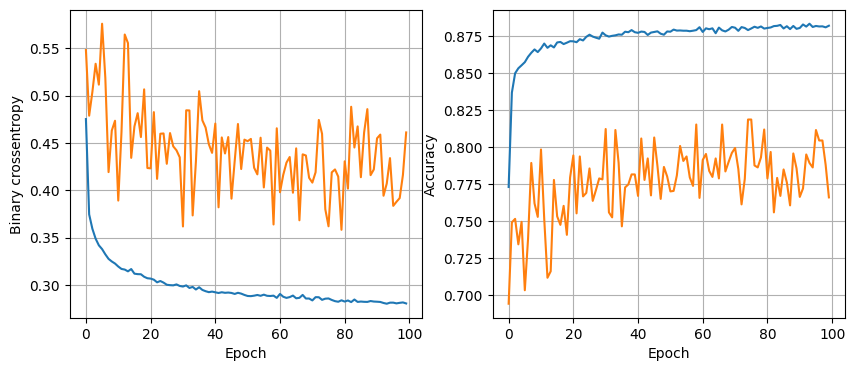

119/119 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8686
16 nodes, dropout 0, lr 0.001, batch size 32


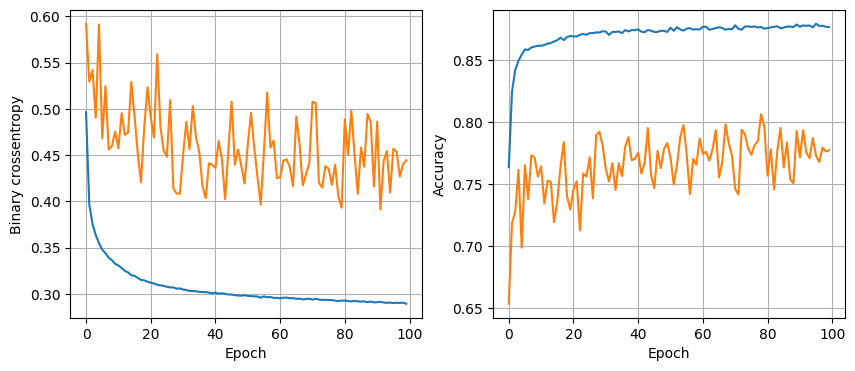

119/119 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.001, batch size 64


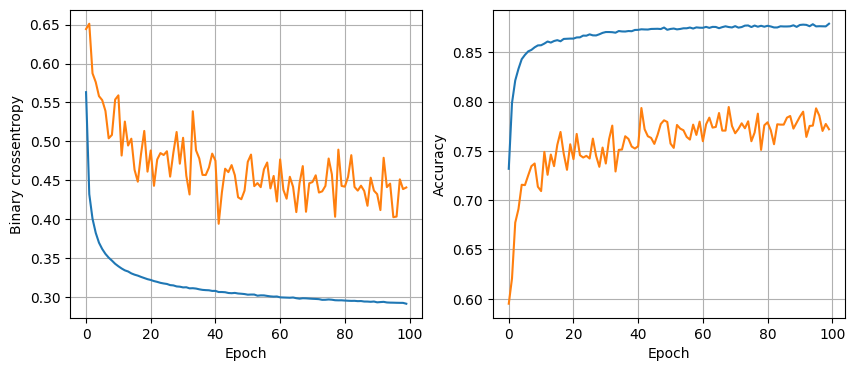

119/119 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 128


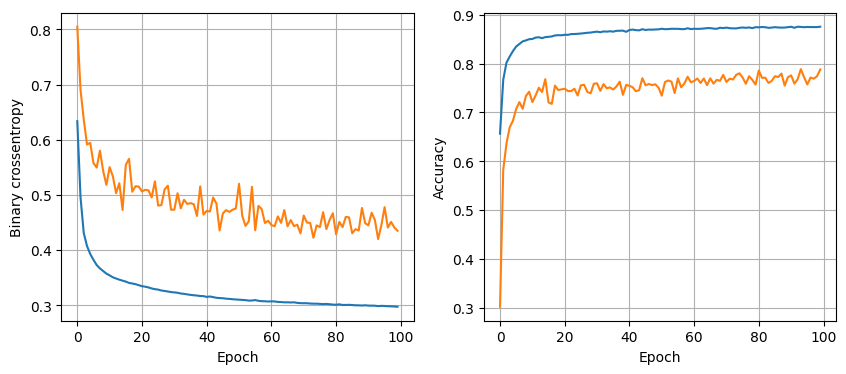

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.1, batch size 32


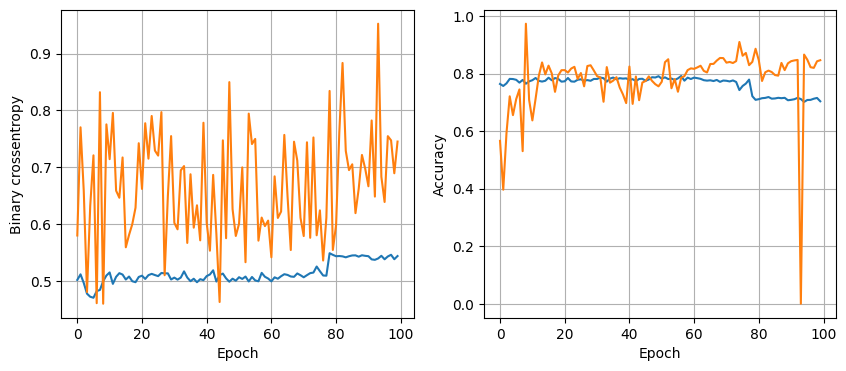

119/119 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7921
16 nodes, dropout 0.2, lr 0.1, batch size 64


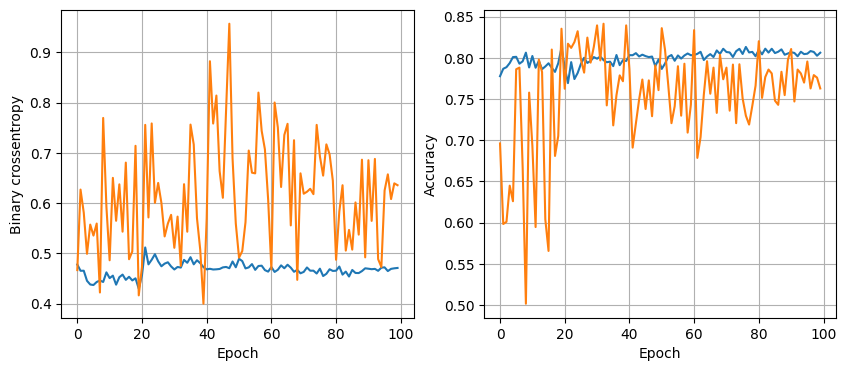

119/119 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8336
16 nodes, dropout 0.2, lr 0.1, batch size 128


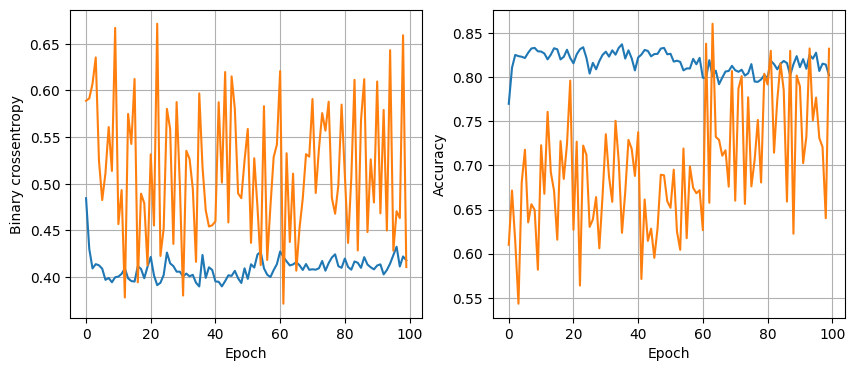

119/119 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8304
16 nodes, dropout 0.2, lr 0.005, batch size 32


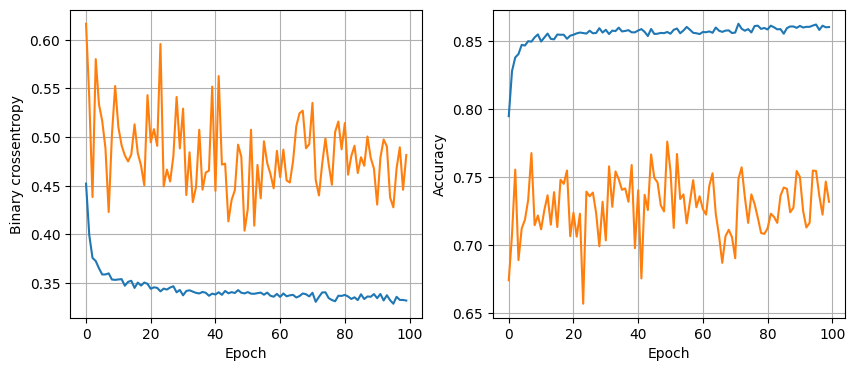

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 64


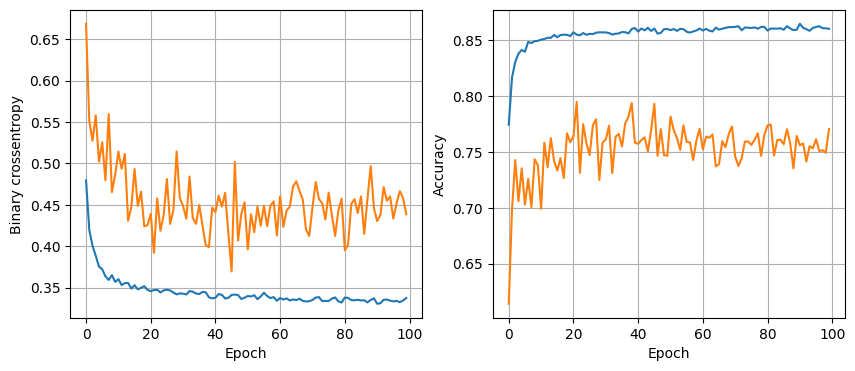

119/119 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.005, batch size 128


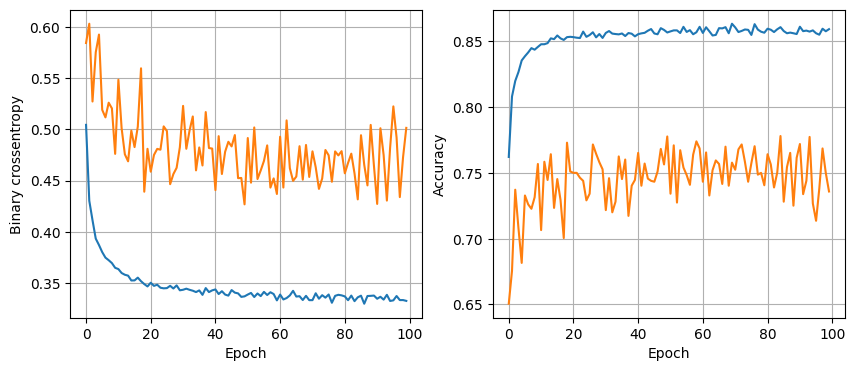

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8562
16 nodes, dropout 0.2, lr 0.001, batch size 32


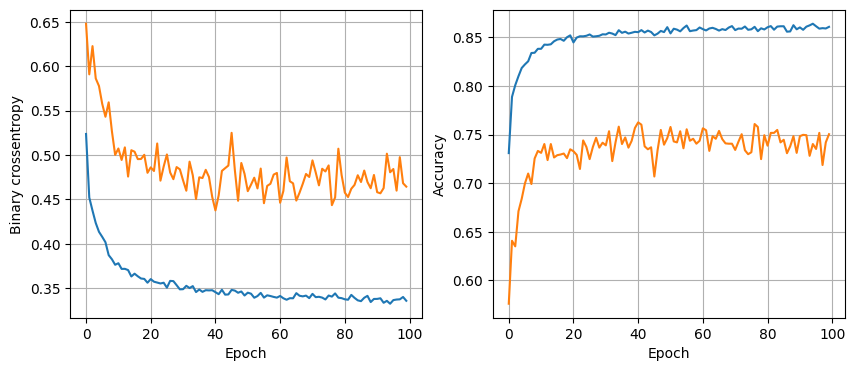

119/119 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8620
16 nodes, dropout 0.2, lr 0.001, batch size 64


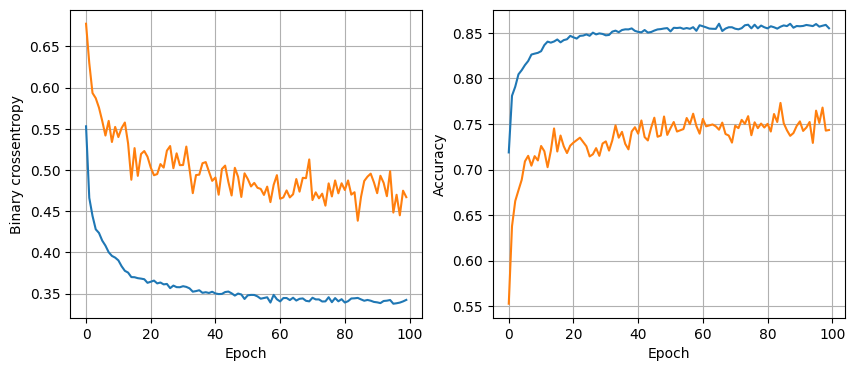

119/119 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8578
16 nodes, dropout 0.2, lr 0.001, batch size 128


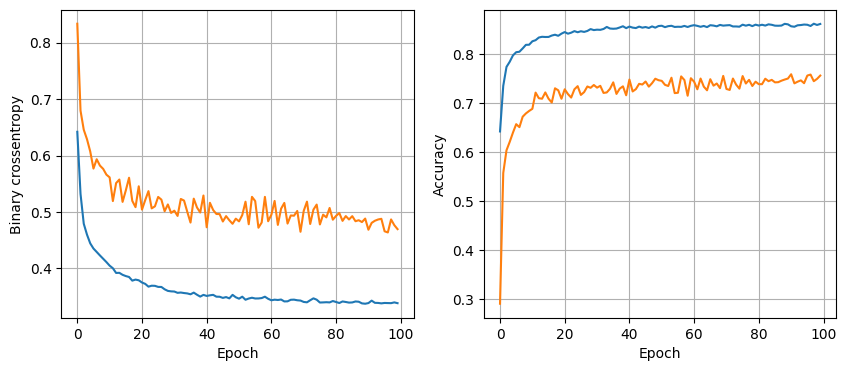

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.1, batch size 32


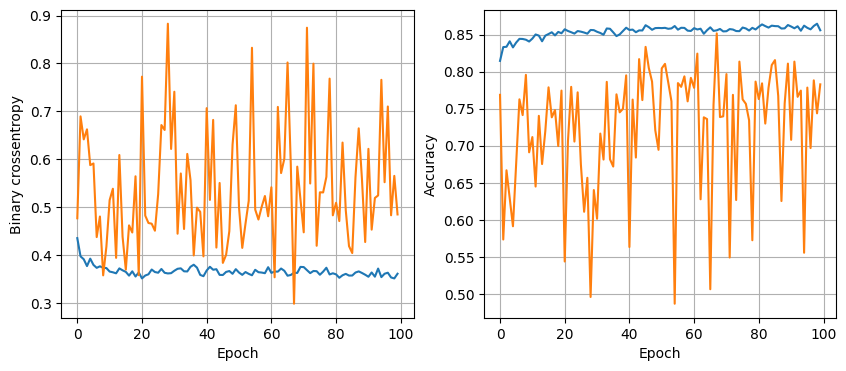

119/119 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8549
32 nodes, dropout 0, lr 0.1, batch size 64


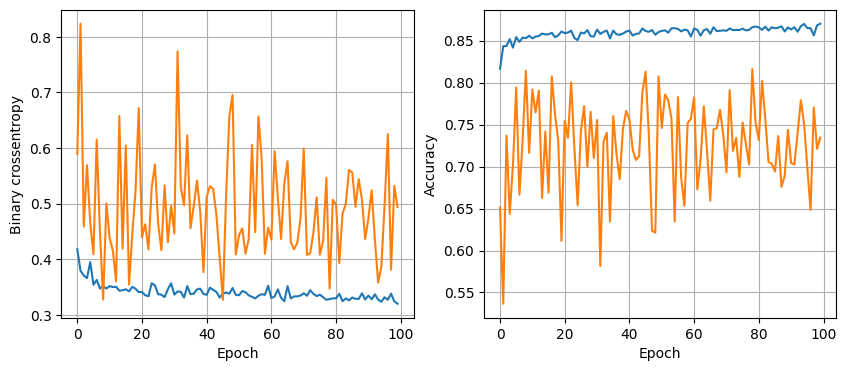

119/119 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8575
32 nodes, dropout 0, lr 0.1, batch size 128


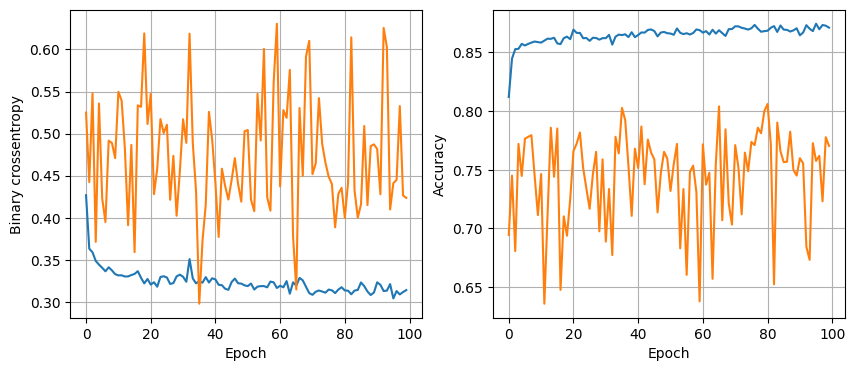

119/119 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8586
32 nodes, dropout 0, lr 0.005, batch size 32


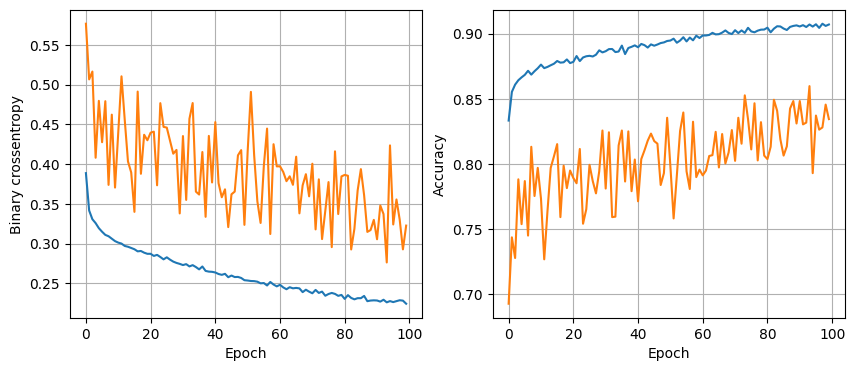

119/119 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.005, batch size 64


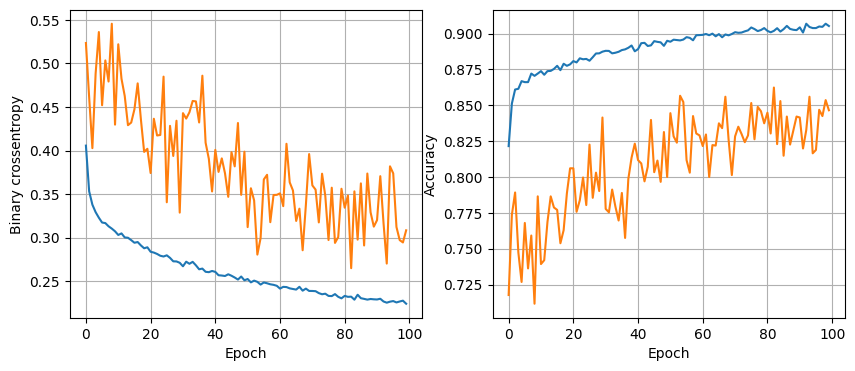

119/119 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.005, batch size 128


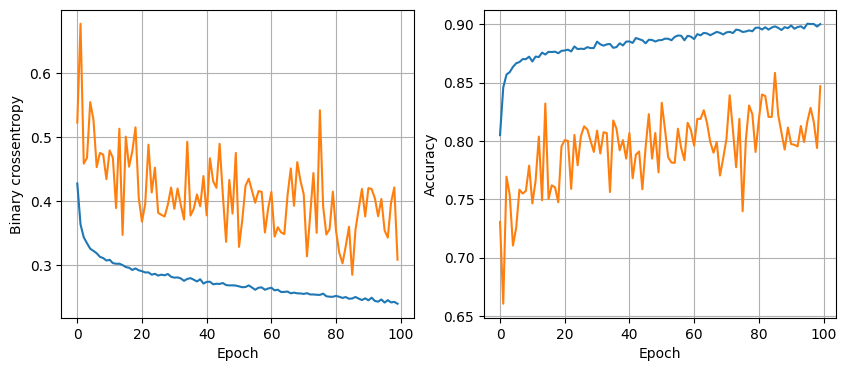

119/119 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.001, batch size 32


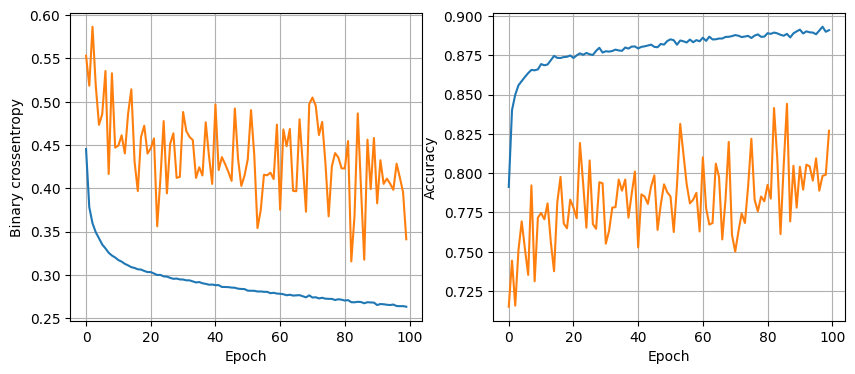

119/119 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8538
32 nodes, dropout 0, lr 0.001, batch size 64


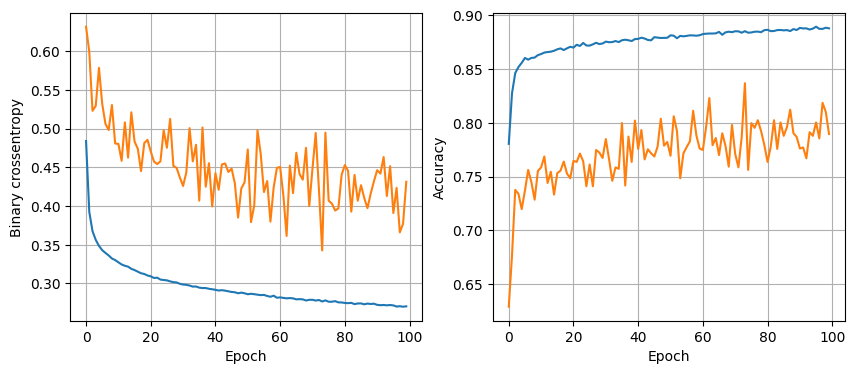

119/119 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8665
32 nodes, dropout 0, lr 0.001, batch size 128


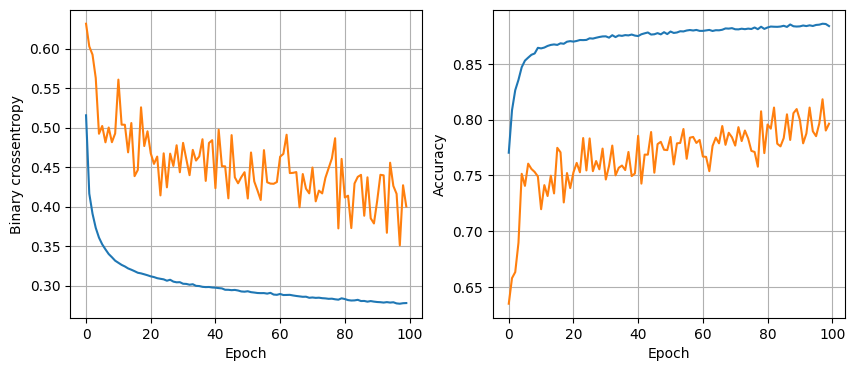

119/119 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8638
32 nodes, dropout 0.2, lr 0.1, batch size 32


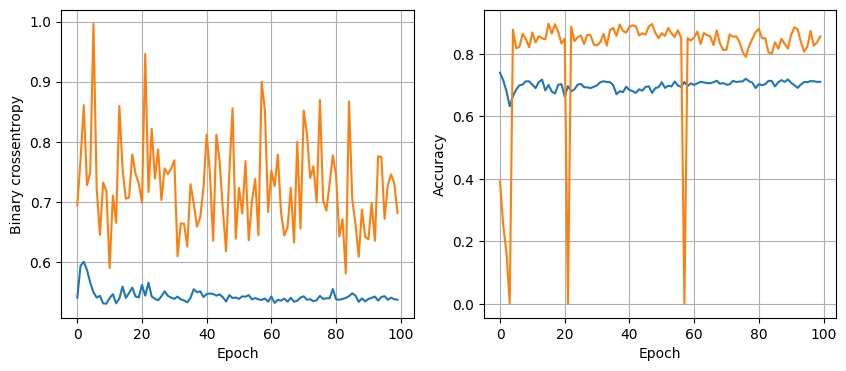

119/119 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7747
32 nodes, dropout 0.2, lr 0.1, batch size 64


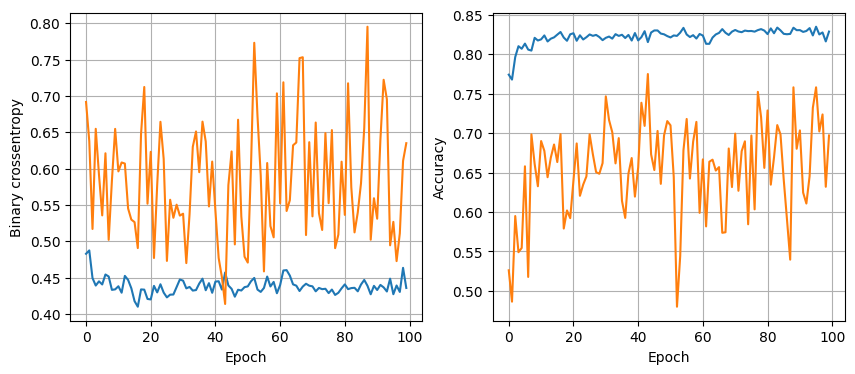

119/119 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8525
32 nodes, dropout 0.2, lr 0.1, batch size 128


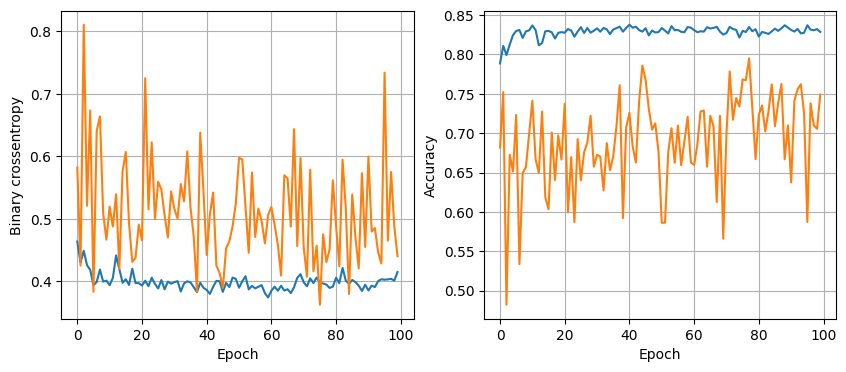

119/119 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8567
32 nodes, dropout 0.2, lr 0.005, batch size 32


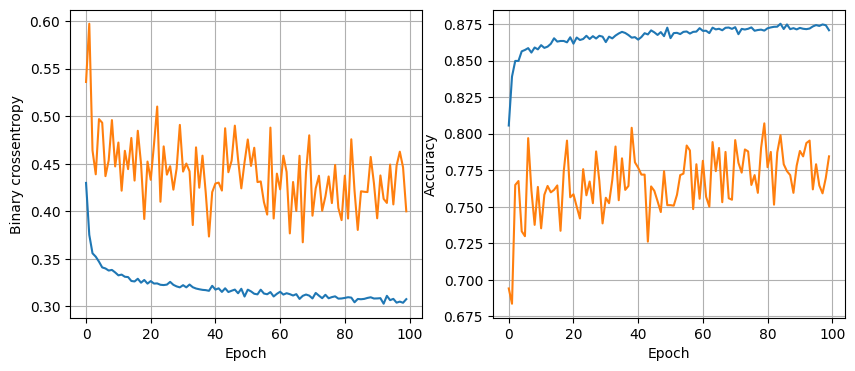

119/119 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.005, batch size 64


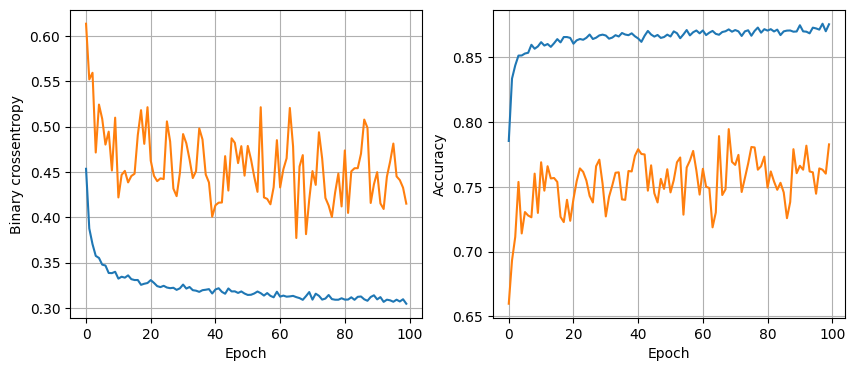

119/119 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.005, batch size 128


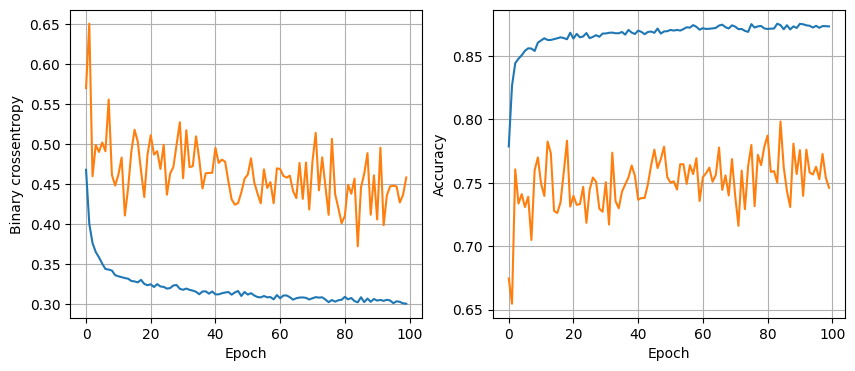

119/119 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 32


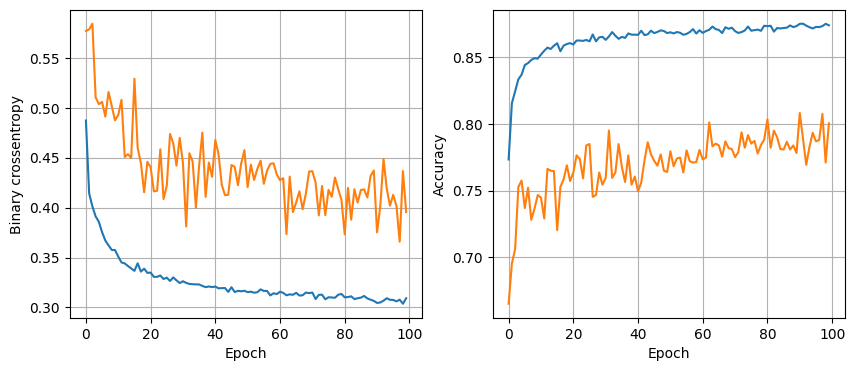

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.001, batch size 64


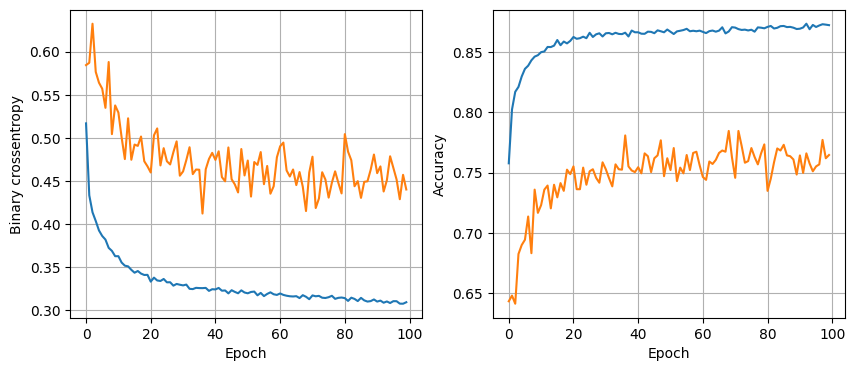

119/119 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.001, batch size 128


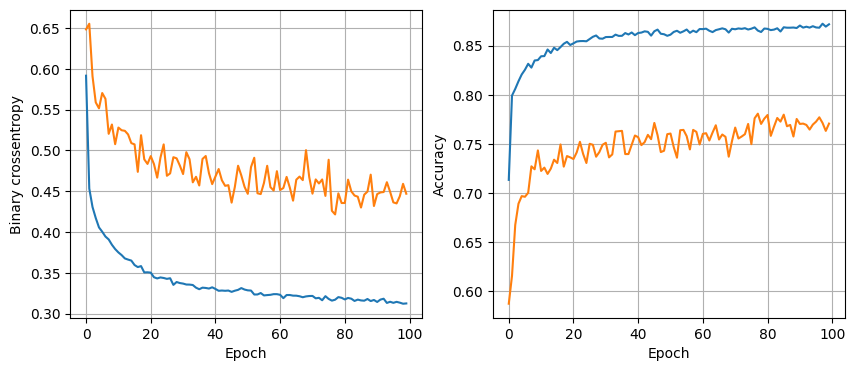

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8691
64 nodes, dropout 0, lr 0.1, batch size 32


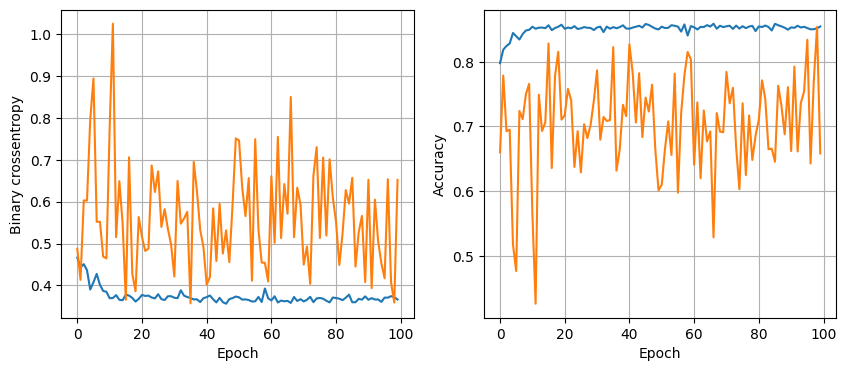

119/119 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8541
64 nodes, dropout 0, lr 0.1, batch size 64


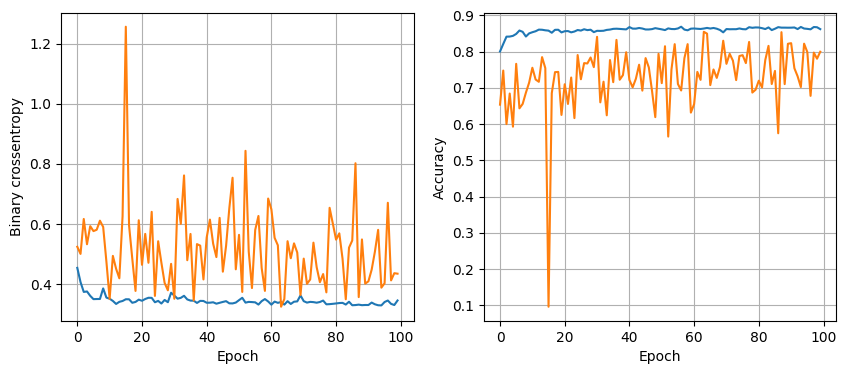

119/119 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8494
64 nodes, dropout 0, lr 0.1, batch size 128


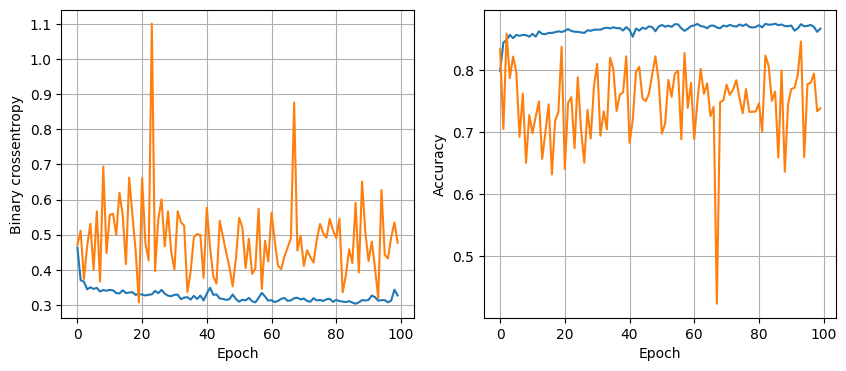

119/119 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.005, batch size 32


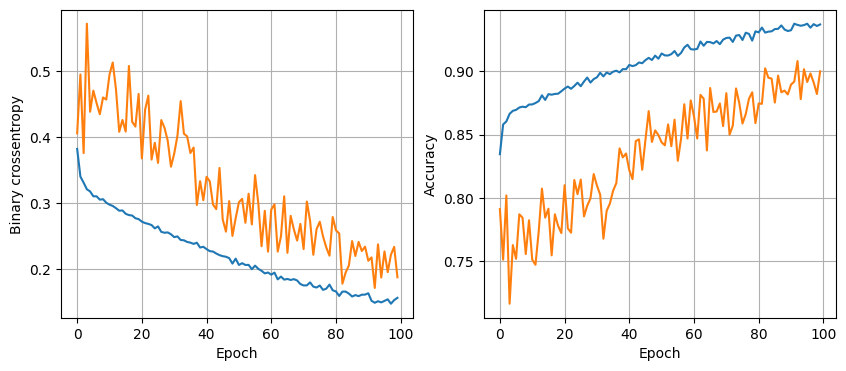

119/119 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.8449
64 nodes, dropout 0, lr 0.005, batch size 64


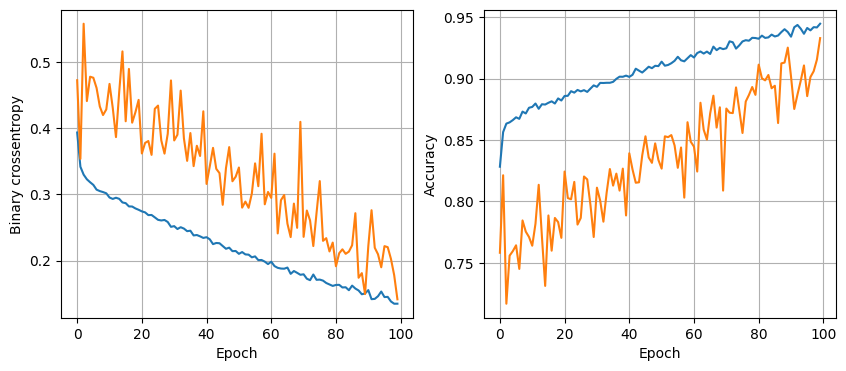

119/119 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.8286
64 nodes, dropout 0, lr 0.005, batch size 128


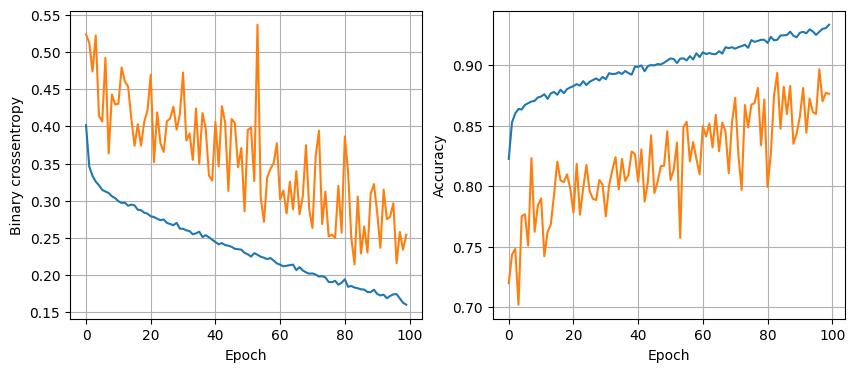

119/119 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8612
64 nodes, dropout 0, lr 0.001, batch size 32


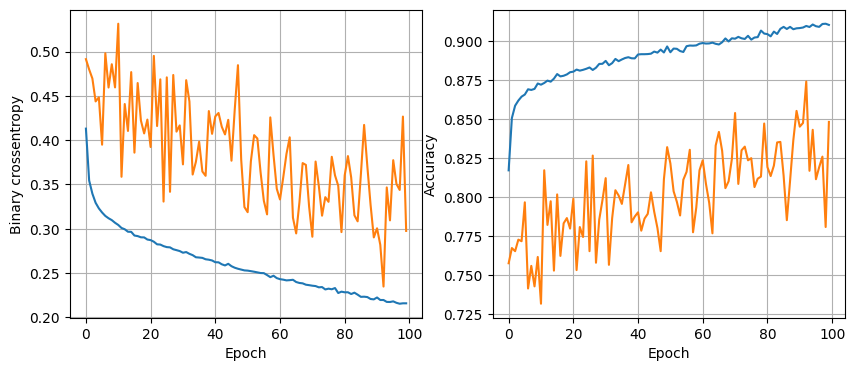

119/119 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8630
64 nodes, dropout 0, lr 0.001, batch size 64


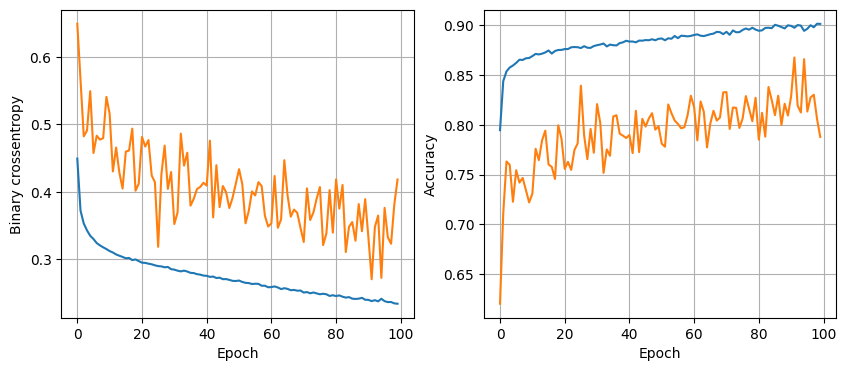

119/119 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.001, batch size 128


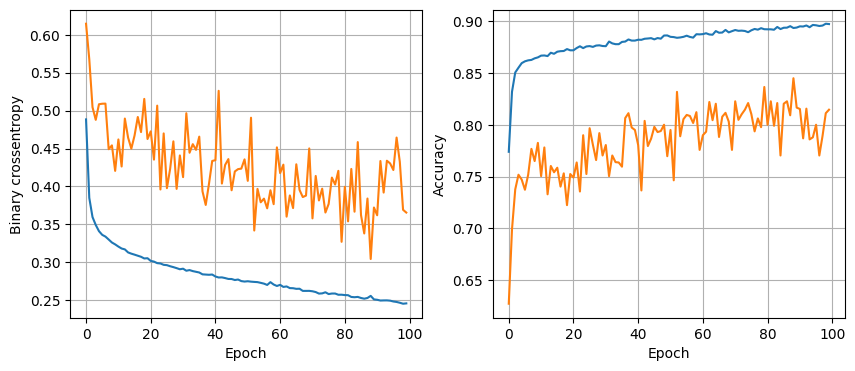

119/119 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8665
64 nodes, dropout 0.2, lr 0.1, batch size 32


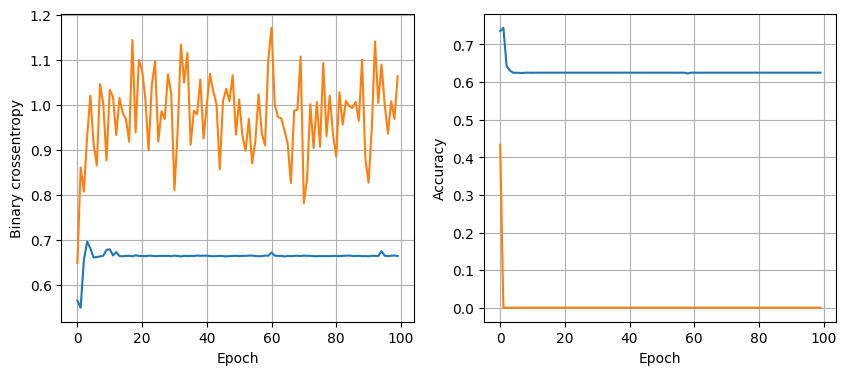

119/119 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6493
64 nodes, dropout 0.2, lr 0.1, batch size 64


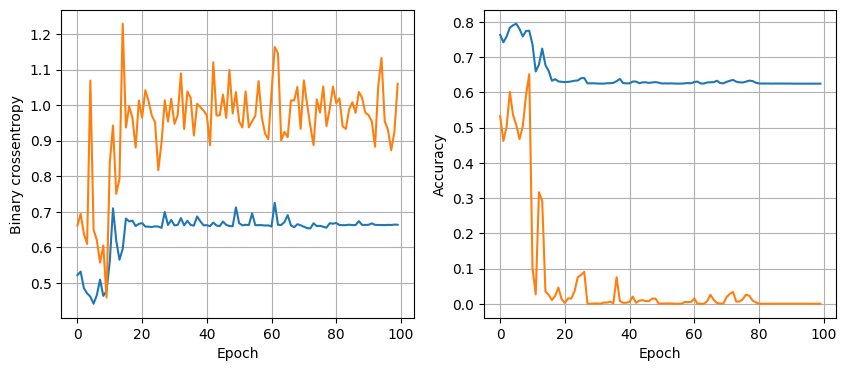

119/119 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6493
64 nodes, dropout 0.2, lr 0.1, batch size 128


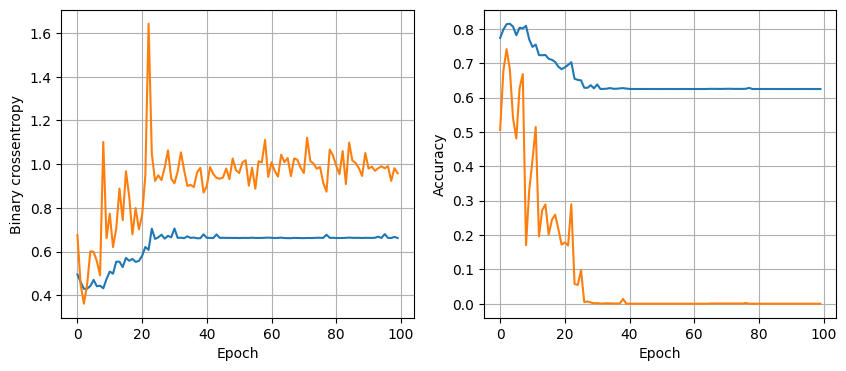

119/119 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6493
64 nodes, dropout 0.2, lr 0.005, batch size 32


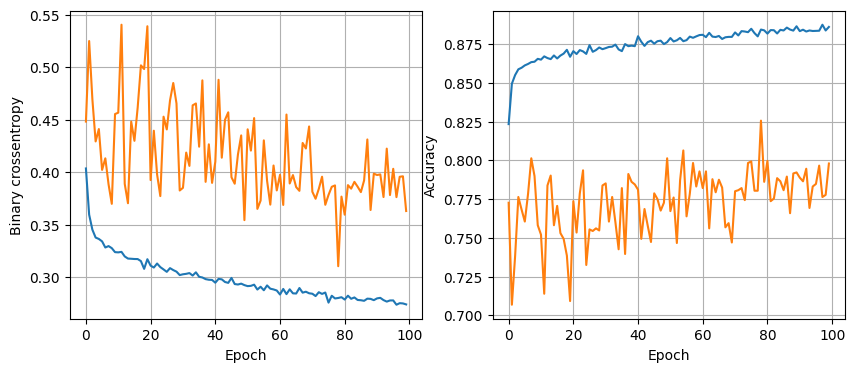

119/119 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.005, batch size 64


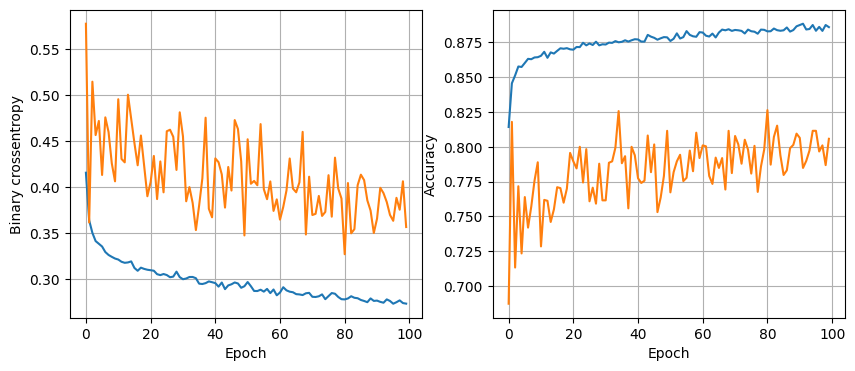

119/119 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.005, batch size 128


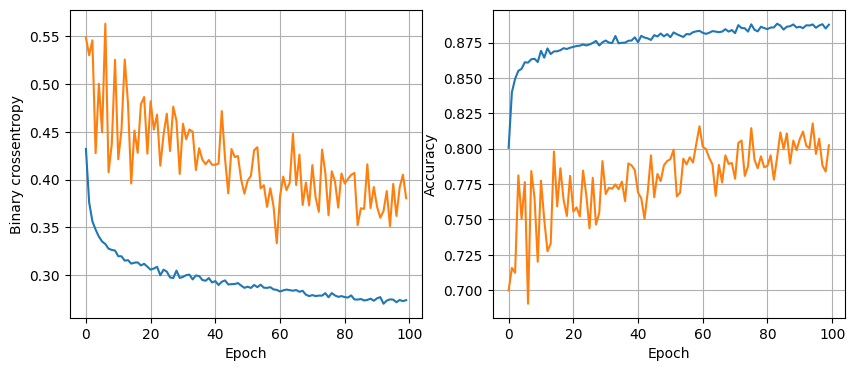

119/119 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8680
64 nodes, dropout 0.2, lr 0.001, batch size 32


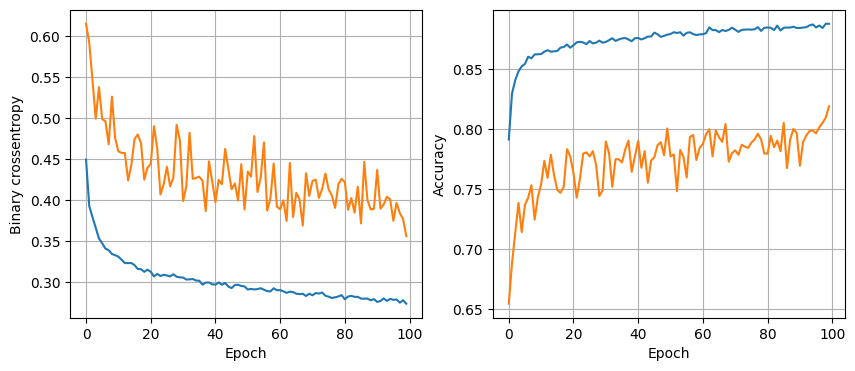

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8641
64 nodes, dropout 0.2, lr 0.001, batch size 64


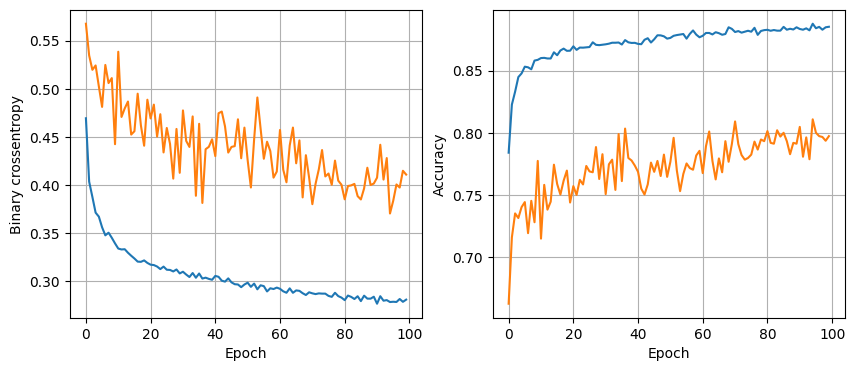

119/119 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.001, batch size 128


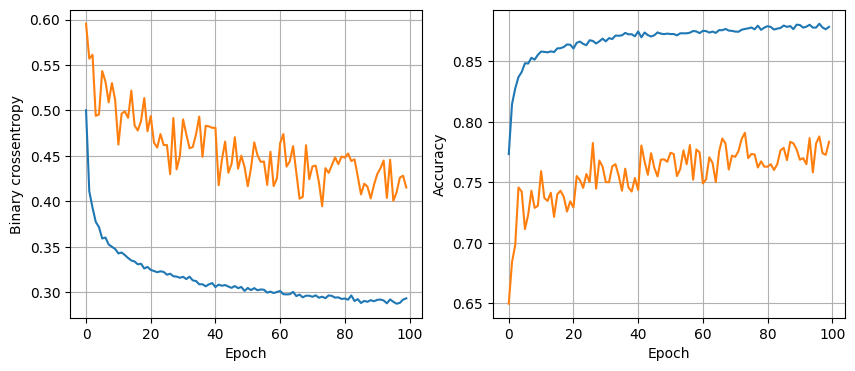

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8683


In [53]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [54]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1353
           1       0.87      0.94      0.91      2451

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

